In [1]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt

In [3]:
model = YOLO("../training/runs/pose/train8/weights/best.pt")

In [4]:
model.val()

Ultralytics 8.3.8  Python-3.12.6 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12288MiB)
YOLO11m-pose summary (fused): 322 layers, 21,414,067 parameters, 0 gradients, 73.8 GFLOPs


val: Scanning C:\Users\Marcin\PycharmProjects\inzynierka\datasets\keypoints_data\valid\labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.82s/it]


                   all         34         34          1          1      0.995      0.992          1          1      0.995      0.967
Speed: 45.0ms preprocess, 197.4ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs\pose\val


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002D1740BD4F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,

Warto pokazać że w związku z wybranymi danymi treningowymi jeżeli nagrania są np pod innym kątem kamery, otrzymujemy gorsze wyniki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../figures/results.csv")

In [4]:
df.columns

Index(['                  epoch', '         train/box_loss',
       '        train/pose_loss', '        train/kobj_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '   metrics/precision(P)', '      metrics/recall(P)',
       '       metrics/mAP50(P)', '    metrics/mAP50-95(P)',
       '           val/box_loss', '          val/pose_loss',
       '          val/kobj_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

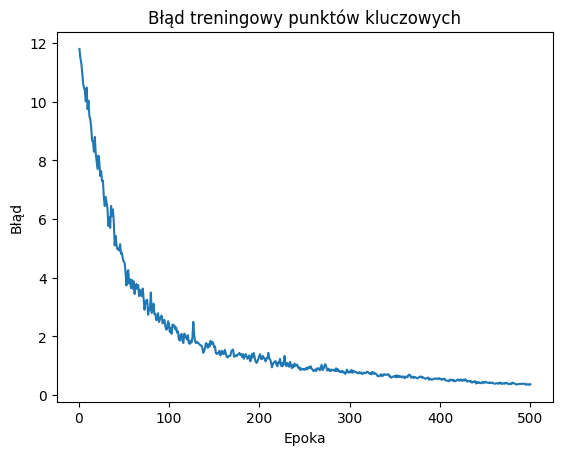

In [7]:
plt.plot(df['                  epoch'], df['        train/pose_loss'])
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.title('Błąd treningowy punktów kluczowych')
plt.savefig("../figures/pose_loss.png", dpi=300)